# Exercise 6

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Random data

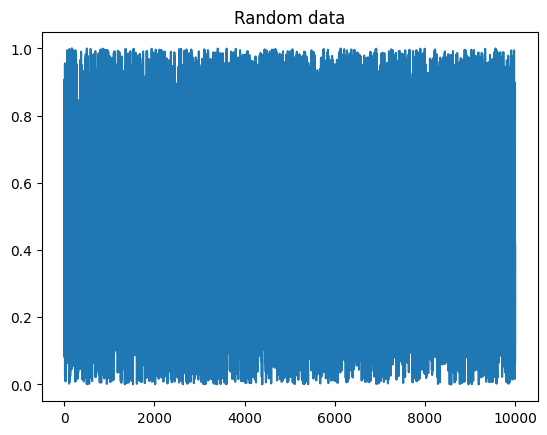

In [37]:
a = np.random.rand(10000)
plt.plot(a)
plt.title('Random data')
plt.show()

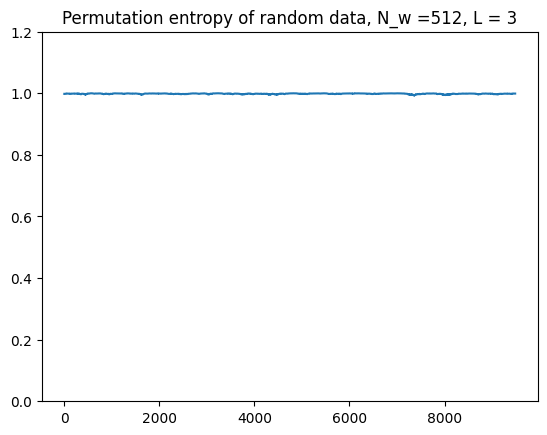

In [36]:
Nw = 512
def permutation_h(a,Nw):
    perm_ent = []
    for i in range(10000-Nw-1):
        perms = np.zeros(6)
        for k in range(Nw):
            x,y,z = a[i+k],a[i+k+1],a[i+k+2]
            if x<y and y<z:
                perms[0] +=1
            elif x<z and z<y:
                perms[1] +=1
            elif y<x and x<z:
                perms[2] +=1
            elif y<z and z<x:
                perms[3] +=1
            elif z<x and x<y:
                perms[4] +=1
            else:
                perms[5] +=1
        
        perms /= np.sum(perms)

        s = 0
        for p in perms:
            if p!=0:
                s -= p*np.log2(p)
        perm_ent.append(s)
    return perm_ent


perm_ent = permutation_h(a,Nw)
plt.plot(np.array(perm_ent)/np.log2(6))
plt.title('Permutation entropy of random data, N_w ='+str(Nw)+', L = 3')
plt.ylim((0,1.2))
plt.show()


### Part 2: Adding a correlated part between 3000 and 4000

We add a correlated part between abscissae 3000 and 4000 by replacing each value by the square root of the product of itself and the subsequent value: $b_{i}=\sqrt{a_ia_{i+1}}$

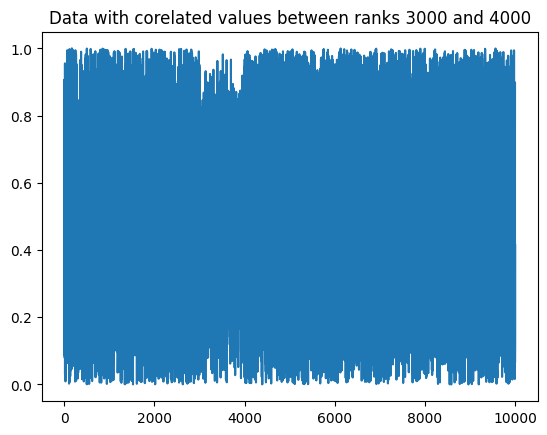

In [40]:
b = a.copy()
b[3000:4000] = [np.sqrt(b[i]*b[i+1]) for i in range(3000,4000)]
plt.title('Data with corelated values between ranks 3000 and 4000')
plt.plot(b)
plt.show()

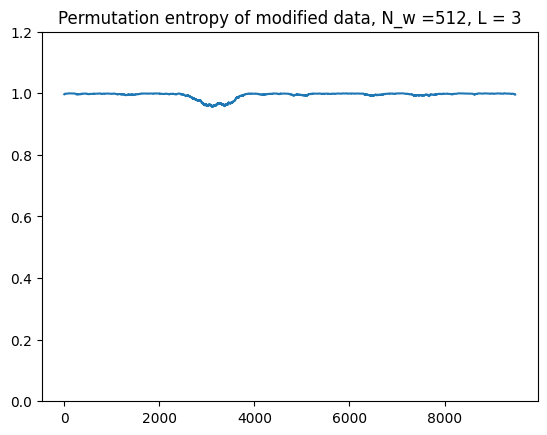

In [41]:
perm_ent = permutation_h(b,Nw)

plt.plot(np.array(perm_ent)/np.log2(6))
plt.title('Permutation entropy of modified data, N_w ='+str(Nw)+', L = 3')
plt.ylim((0,1.2))
plt.show()

As expected, since the data between 3000 and 4000 is now correlated we can notice a drop in permutation entropy.